In [1]:
import pandas as pd
import numpy as np
import pyranges
from gtfparse import read_gtf
import matplotlib.pyplot as plt

In [2]:
#read all files
df_nongenes = pd.read_csv("/home/dbeb/btech/bb1160039/scratch/project/rmmulti/Mouse Heart/counts_non_genes_heart_10k_rmmulti.csv", index_col=0)
df_gtf = read_gtf("/home/dbeb/btech/bb1160039/scratch/project/mouse_gencode.vM25.chr_patch_hapl_scaff.annotation.gtf")

INFO:root:Extracted GTF attributes: ['gene_id', 'gene_type', 'gene_name', 'level', 'mgi_id', 'havana_gene', 'transcript_id', 'transcript_type', 'transcript_name', 'transcript_support_level', 'tag', 'havana_transcript', 'exon_number', 'exon_id', 'protein_id', 'ccdsid', 'ont']


In [3]:
#creating pyranges object for non-genes
l_se_name = []
l_se_chr = []
l_se_start = []
l_se_end = []
for x in df_nongenes.index:
    l_se_name.append(x)
    l_se_chr.append("chr"+x.split("-")[1])
    l_se_start.append(x.split("-")[2])
    l_se_end.append(str(int(x.split("-")[2])+int(x.split("-")[3])))
    
dict_ngenes= {"Chromosome":l_se_chr,"Start": l_se_start,"End": l_se_end,"Name":l_se_name}
py_ng=pyranges.from_dict(dict_ngenes)
py_ng

+--------------+-----------+-----------+--------------------+
| Chromosome   | Start     | End       | Name               |
| (category)   | (int32)   | (int32)   | (object)           |
|--------------+-----------+-----------+--------------------|
| chr1         | 10007465  | 10007556  | gene-1-10007465-91 |
| chr1         | 10015395  | 10015486  | gene-1-10015395-91 |
| chr1         | 10015447  | 10015538  | gene-1-10015447-91 |
| chr1         | 10015499  | 10015590  | gene-1-10015499-91 |
| ...          | ...       | ...       | ...                |
| chrY         | 9374068   | 9374147   | gene-Y-9374068-79  |
| chrY         | 9374068   | 9374148   | gene-Y-9374068-80  |
| chrY         | 9411927   | 9411990   | gene-Y-9411927-63  |
| chrY         | 979436    | 979527    | gene-Y-979436-91   |
+--------------+-----------+-----------+--------------------+
Unstranded PyRanges object has 506,787 rows and 4 columns from 21 chromosomes.
For printing, the PyRanges was sorted on Chromosome.

In [4]:
#creating pyranges object for genes
df_genes = df_gtf[df_gtf["feature"] == "gene"]

In [5]:
gene_type=df_genes.gene_type.value_counts().index
interval = [0,10,20,50,100,500,1000,5000,10000,50000,100000]
overlaps_forward=[]
overlaps_back=[]
for gtype in gene_type:
    df_type = df_genes[df_genes.gene_type==gtype]
    for i in interval:
        dict_type_forward ={"Chromosome":df_type.seqname,"Start":df_type.start,"End":df_type.end+i}
        py_gg_forward = pyranges.from_dict(dict_type_forward)
        overlap_forward=py_ng.count_overlaps(py_gg_forward).as_df()
        overlaps_forward.append([str(gtype+"-"+str(i)),len(list(overlap_forward[overlap_forward.NumberOverlaps>0].Name))])
        dict_type_back ={"Chromosome":df_type.seqname,"Start":df_type.start-i,"End":df_type.end}
        py_gg_back = pyranges.from_dict(dict_type_back)
        overlap_back=py_ng.count_overlaps(py_gg_back).as_df()
        overlaps_back.append([str(gtype+"-"+str(i)),len(list(overlap_back[overlap_back.NumberOverlaps>0].Name))])

INFO:numexpr.utils:Note: NumExpr detected 24 cores but "NUMEXPR_MAX_THREADS" not set, so enforcing safe limit of 8.


In [6]:
ae = [element * len(interval) for element in list(range(0,len(gene_type)))]
x_ax_for=[]
y_ax_for=[]
x_ax_back=[]
y_ax_back=[]
n_ax=[]
for a in ae:
    x1=[]
    y1=[]
    x2=[]
    y2=[]
    for i in range(a,a+11):
        x1.append(-int(overlaps_back[i][0].split("-")[1]))
        y1.append(int(overlaps_back[i][1]))
        x2.append(int(overlaps_forward[i][0].split("-")[1]))
        y2.append(int(overlaps_forward[i][1]))
    x_ax_for.append(x1)
    y_ax_for.append(y1)
    x_ax_back.append(x2)
    y_ax_back.append(y2)
    n_ax.append(overlaps_back[a][0].split("-")[0])

In [20]:
import colorsys
N = len(n_ax)
HSV_tuples = [(x*1.0/10, 0.8, 0.8) for x in range(N)]
RGB_tuples = list(map(lambda x: colorsys.hsv_to_rgb(*x), HSV_tuples))

In [21]:
gene_type

Index(['protein_coding', 'processed_pseudogene', 'lincRNA', 'TEC', 'antisense',
       'unprocessed_pseudogene', 'miRNA', 'snoRNA', 'snRNA',
       'processed_transcript', 'misc_RNA', 'rRNA', 'sense_intronic',
       'transcribed_processed_pseudogene',
       'transcribed_unprocessed_pseudogene', 'IG_V_gene',
       'bidirectional_promoter_lncRNA', 'IG_V_pseudogene', 'TR_V_gene',
       'pseudogene', 'lncRNA', 'polymorphic_pseudogene', 'TR_J_gene',
       'unitary_pseudogene', 'scaRNA', 'TR_V_pseudogene', 'sense_overlapping',
       'transcribed_unitary_pseudogene', 'ribozyme', 'Mt_tRNA', 'IG_D_gene',
       'IG_J_gene', 'IG_C_gene', 'TR_J_pseudogene', 'TR_C_gene', 'IG_LV_gene',
       'TR_D_gene', '3prime_overlapping_ncRNA', 'IG_D_pseudogene',
       'translated_unprocessed_pseudogene', 'IG_pseudogene', 'sRNA', 'Mt_rRNA',
       'macro_lncRNA', 'scRNA', 'IG_C_pseudogene'],
      dtype='object')

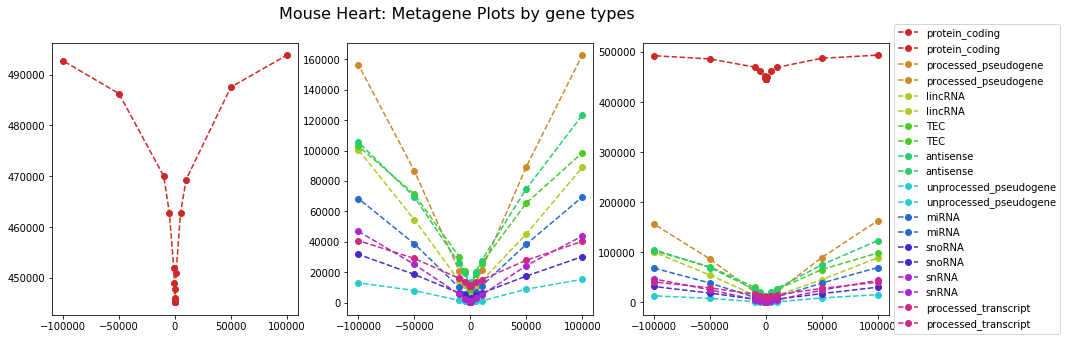

In [62]:
fig, axs = plt.subplots(1,3,figsize = (15, 5))
axs[0].plot(x_ax_for[0],y_ax_for[0],label=n_ax[0],linestyle='--', marker='o', color=RGB_tuples[0])
axs[0].plot(x_ax_back[0],y_ax_back[0],label=n_ax[0],linestyle='--', marker='o', color=RGB_tuples[0])
for i in range(1,10):
    axs[1].plot(x_ax_for[i],y_ax_for[i],label=n_ax[i],linestyle='--', marker='o', color=RGB_tuples[i])
    axs[1].plot(x_ax_back[i],y_ax_back[i],label=n_ax[i],linestyle='--', marker='o', color=RGB_tuples[i])
for i in range(0,10):
    axs[2].plot(x_ax_for[i],y_ax_for[i],label=n_ax[i],linestyle='--', marker='o', color=RGB_tuples[i])
    axs[2].plot(x_ax_back[i],y_ax_back[i],label=n_ax[i],linestyle='--', marker='o', color=RGB_tuples[i])
axs[2].legend(loc='center left', bbox_to_anchor=(1,0.5))
fig.suptitle('Mouse Heart: Metagene Plots by gene types', fontsize=16);

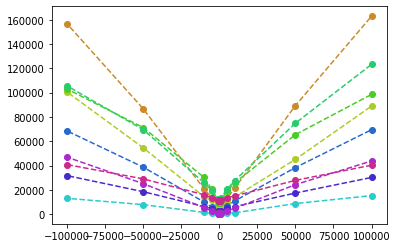

In [16]:
# Check overlap intervals
dict_genes={"Chromosome":df_genes.seqname,"Start":df_genes.start,"End":df_genes.end}
py_gg = pyranges.from_dict(dict_genes)
py_gg
overlaps=py_ng.count_overlaps(py_gg).as_df()

In [17]:
chr1_coexp = list(overlaps[overlaps.NumberOverlaps>0].Name)

In [18]:
markers = pd.read_csv("marker_neurons.csv", header=None, names=["genes"])

FileNotFoundError: [Errno 2] File marker_neurons.csv does not exist: 'marker_neurons.csv'

In [19]:
com=set(chr1_coexp).intersection(markers.genes)

NameError: name 'markers' is not defined

In [100]:
chrs=[]
for x in com:
    chrs.append(x.split("-")[1])

In [101]:
heights=list(pd.DataFrame(chrs, columns=["chr"]).chr.value_counts())
labels=pd.DataFrame(chrs, columns=["chr"]).chr.value_counts().index

<BarContainer object of 20 artists>

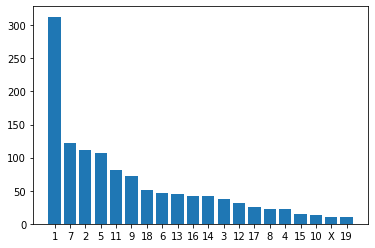

In [102]:
plt.bar(x=labels, height=heights)

In [103]:
len(chrs)

1223

In [ ]:
f=open('f1.txt','w')
for ele in l1:
    f.write(ele+'\n')